In [1]:
# Preliminaries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# disable warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.stattools import coint

In [7]:
root = 'C:/Users/Bowen/Desktop/IAQF/Data/'
df = pd.read_csv(root + 'all_data.csv', index_col='date', parse_dates=True)
pairs = ['MID', 'NDX']
MID = pairs[0]
NDX = pairs[1]
df = df[[MID, NDX]]

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Index')

Text(0.5, 1.0, 'Line plot with custom colors')

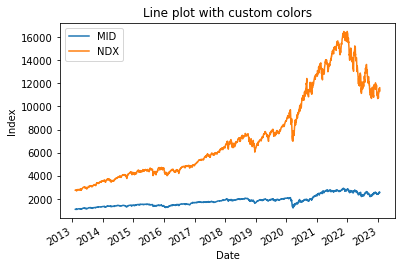

In [18]:
ax = df.plot()

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Line plot with custom colors')

# Show the plot
plt.show()

<AxesSubplot:xlabel='date'>

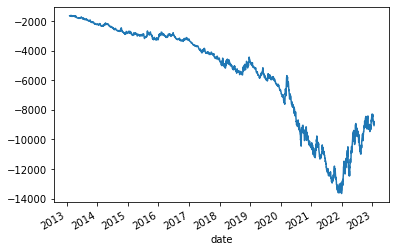

In [9]:
(df.iloc[:,0] - df.iloc[:,1]).plot()

In [10]:
# correlation
def correlation(df):
    return df.iloc[:,0].corr(df.iloc[:,1])

# Jarque Bera test for normality
# if diff follow normal dist, small p val == normal (i.e. skweness and kurtosis = 0)
def check_normal(df):
    return stats.jarque_bera(df.iloc[:,0] - df.iloc[:,1])

# Augmented Dickey-Fuller test for stationarity (only return test statistic and p val)
# small p val == stationary
def check_stationary(df):
    return [adfuller(df.iloc[:,0])[:2], adfuller(df.iloc[:,1])[:2]]

# check for cointegration
# return t stats and p value
def check_cointegration(df):
    return coint(df.iloc[:,0], df.iloc[:,1])[:2]

# ljung-box test for autocorrelation 
# small p val == autocorrelation
def check_autocorrelation(df):
    return [[acorr_ljungbox(df.iloc[:,0], lags=[1], return_df=True).iloc[0,0], 
             acorr_ljungbox(df.iloc[:,0], lags=[1], return_df=True).iloc[0,1]], 
            [acorr_ljungbox(df.iloc[:,1], lags=[1], return_df=True).iloc[0,0], 
             acorr_ljungbox(df.iloc[:,1], lags=[1], return_df=True).iloc[0,1]]]

# Engle's test for ARCH (only return lagrange multiplier test stat and p val)
# small p val == ARCH effect present
def check_arch(df):
    return [het_arch(df.iloc[:,0])[:2], het_arch(df.iloc[:,1])[:2]]


In [11]:
correlation(df)

0.9525803886598703

In [12]:
check_normal(df)
# normal dist

Jarque_beraResult(statistic=251.22462503249392, pvalue=0.0)

In [13]:
check_stationary(df)
# non-stationary

[(-1.2993335475752603, 0.6294771612920782),
 (-0.8901310568467928, 0.79120502640681)]

In [14]:
df[:"2019-01-01"]

,MID,NDX
date,,
2013-02-07,1102.62,2746.50
2013-02-08,1109.09,2775.56
2013-02-14,1117.12,2771.43
2013-02-15,1115.75,2764.67
2013-02-19,1123.74,2782.86
...,...,...
2018-12-19,1665.72,6342.97
2018-12-20,1644.33,6243.19
2018-12-21,1611.35,6046.56


In [15]:
check_cointegration(df)
# no cointegration for full data set

check_cointegration(df[:"2020-01-01"])
# no cointegration for partial data set prior to the pandemic

(-2.2744259146451205, 0.3863810214855716)

(-2.7159717423019125, 0.193886938401712)

In [16]:
check_autocorrelation(df)
# autocorrelated

[[2056.727000136208, 0.0], [2062.6601340282105, 0.0]]

In [17]:
check_arch(df)
# arch effect present (i.e. clustering of vo)

[(2047.7819576982424, 0.0), (2050.6500754150584, 0.0)]